In [1]:
import numpy as np
from tensorflow import keras
from keras import models 
from keras import layers
import matplotlib.pyplot as plt

from keras.datasets import imdb
# https://www.imdb.com/
(X, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


In [2]:
# text to vector
def vect(seq, dim=10000):
    x=np.zeros((len(seq),dim))
    for n, i in enumerate(seq):
        x[n, i] = 1
    return x

X_train=vect(X)
X_test=vect(X_test)

In [3]:
X_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [4]:
net = models.Sequential()
net.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
net.add(layers.Dropout(0.5))
net.add(layers.Dense(16, activation='relu'))
net.add(layers.Dropout(0.5))
net.add(layers.Dense(1, activation='sigmoid'))
net.compile(optimizer='nadam', loss='binary_crossentropy', metrics = ['acc'])

X_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

val = net.fit(partial_X_train, partial_y_train, epochs=5, batch_size=128, validation_data=(X_val, y_val))

Epoch 1/5
118/118 [==============================] - 2s 13ms/step - loss: 0.5745 - acc: 0.7023 - val_loss: 0.3780 - val_acc: 0.8730
Epoch 2/5
118/118 [==============================] - 1s 11ms/step - loss: 0.3689 - acc: 0.8553 - val_loss: 0.2879 - val_acc: 0.8854
Epoch 3/5
118/118 [==============================] - 1s 11ms/step - loss: 0.2794 - acc: 0.8941 - val_loss: 0.2756 - val_acc: 0.8877
Epoch 4/5
118/118 [==============================] - 1s 10ms/step - loss: 0.2334 - acc: 0.9187 - val_loss: 0.2853 - val_acc: 0.8886
Epoch 5/5
118/118 [==============================] - 1s 11ms/step - loss: 0.1937 - acc: 0.9330 - val_loss: 0.3026 - val_acc: 0.8873


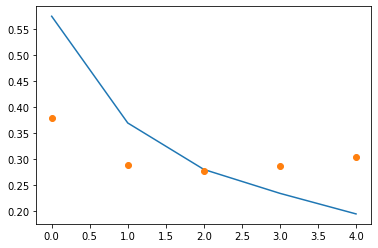

In [5]:
val_dict = val.history
loss = val_dict['loss']
val_loss = val_dict['val_loss']
x = np.arange(0,len(loss))

plt.plot(x,loss,'-')
plt.plot(x,val_loss,'o')

In [6]:
test_loss, test_acc = net.evaluate(X_test,y_test)

782/782 [==============================] - 1s 1ms/step - loss: 0.3205 - acc: 0.8782


## IMDB Classification using simple RNN

In [7]:
from keras.preprocessing import sequence

max_words=10000 
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_words)

maxlen = 100 # sequence length
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)

In [8]:
X_train[0]

array([1415,   33,    6,   22,   12,  215,   28,   77,   52,    5,   14,
        407,   16,   82,    2,    8,    4,  107,  117, 5952,   15,  256,
          4,    2,    7, 3766,    5,  723,   36,   71,   43,  530,  476,
         26,  400,  317,   46,    7,    4,    2, 1029,   13,  104,   88,
          4,  381,   15,  297,   98,   32, 2071,   56,   26,  141,    6,
        194, 7486,   18,    4,  226,   22,   21,  134,  476,   26,  480,
          5,  144,   30, 5535,   18,   51,   36,   28,  224,   92,   25,
        104,    4,  226,   65,   16,   38, 1334,   88,   12,   16,  283,
          5,   16, 4472,  113,  103,   32,   15,   16, 5345,   19,  178,
         32], dtype=int32)

In [19]:
rnn = models.Sequential()
rnn.add(layers.Embedding(max_words, 16)) # 각각의 단어를 n=16 차원 공간에 올리기
rnn.add(layers.SimpleRNN(32,return_sequences='True')) 
rnn.add(layers.Dropout(0.2))
rnn.add(layers.SimpleRNN(16, activation = 'linear', input_shape= (100,1), return_sequences= False))

# 다층 RNN를 하기 위해 return_sequences = True로 설정

In [20]:
X_train.shape, y_train.shape

((25000, 100), (25000,))

In [21]:
rnn.add(layers.Dense(1))
rnn.compile(optimizer='nadam', loss='mse', metrics=['acc'])

In [22]:
rnn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          1568      
_________________________________________________________________
dropout_3 (Dropout)          (None, None, 32)          0         
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 16)                784       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 162,369
Trainable params: 162,369
Non-trainable params: 0
_________________________________________________________________


In [23]:
history = rnn.fit(X_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
625/625 [==============================] - 21s 33ms/step - loss: 0.2336 - acc: 0.6612 - val_loss: 0.1802 - val_acc: 0.7150
Epoch 2/50
625/625 [==============================] - 21s 33ms/step - loss: 0.1219 - acc: 0.8530 - val_loss: 0.1301 - val_acc: 0.8296
Epoch 3/50
625/625 [==============================] - 21s 33ms/step - loss: 0.0953 - acc: 0.9039 - val_loss: 0.1348 - val_acc: 0.8196
Epoch 4/50
625/625 [==============================] - 21s 34ms/step - loss: 0.0727 - acc: 0.9401 - val_loss: 0.1441 - val_acc: 0.8160
Epoch 5/50
625/625 [==============================] - 20s 33ms/step - loss: 0.0522 - acc: 0.9717 - val_loss: 0.1489 - val_acc: 0.8008
Epoch 6/50
625/625 [==============================] - 20s 33ms/step - loss: 0.0361 - acc: 0.9894 - val_loss: 0.1615 - val_acc: 0.7896
Epoch 7/50
625/625 [==============================] - 21s 33ms/step - loss: 0.0263 - acc: 0.9966 - val_loss: 0.1713 - val_acc: 0.7798
Epoch 8/50
625/625 [==============================] - 21s 34ms

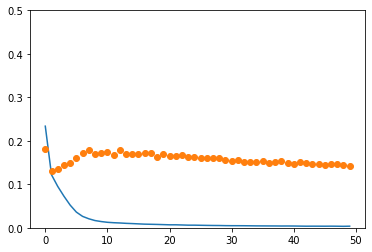

In [25]:
loss = history.history['loss']
val= history.history['val_loss']
plt.ylim(0,0.5)
plt.plot(loss)
plt.plot(val, 'o')

In [35]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import models
from keras import layers
zip_path = keras.utils.get_file(origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip', fname= 'jena_climate_2009_2016.csv.zip', extract=True)
csv_path, _ = os.path.splitext(zip_path)
import pandas as pd
df = pd.read_csv(csv_path)

13574144/13568290 [==============================] - 0s 0us/step


In [36]:
temp=df['T (degC)']

In [39]:
temp=np.array(df['T (degC)'])

In [40]:
y1 = rnn.predict(X_train).flatten()
y2 = y_train
np.mean(np.abs(y1-y2))*np.std(temp)

0.7345903824815339